In [ ]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_data=pd.read_csv('health care diabetes.csv')

In [ ]:
df_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df_data.info() #PIMA Indian Heritage data for diabetes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 2 columns of 'Float datatype' and rest are 'Integer datatype'

In [ ]:
df_data['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [ ]:
df_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#From data description we can see that there is a 0 minimum value for columns 2 to 6, which doesn't make sense.

In [ ]:
df_data.shape

(768, 9)

<BarContainer object of 2 artists>

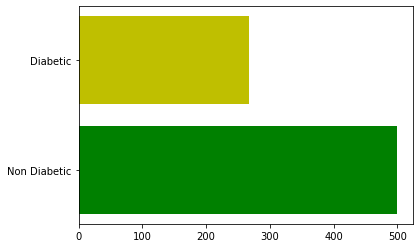

In [ ]:
y=df_data['Outcome'].value_counts()
x=y.index
plt.yticks(x,['Non Diabetic','Diabetic'])
plt.barh(x,y,color=['g','y'])


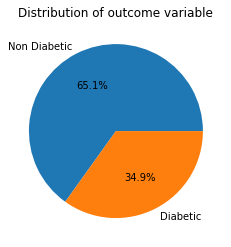

In [ ]:
plt.title('Distribution of outcome variable')
plt.pie(y,labels=['Non Diabetic','Diabetic'],autopct = '%1.1f%%');

The above graph shows that the data is unbalanced. The number of non-diabetic is 268 the number of diabetic patients is 500

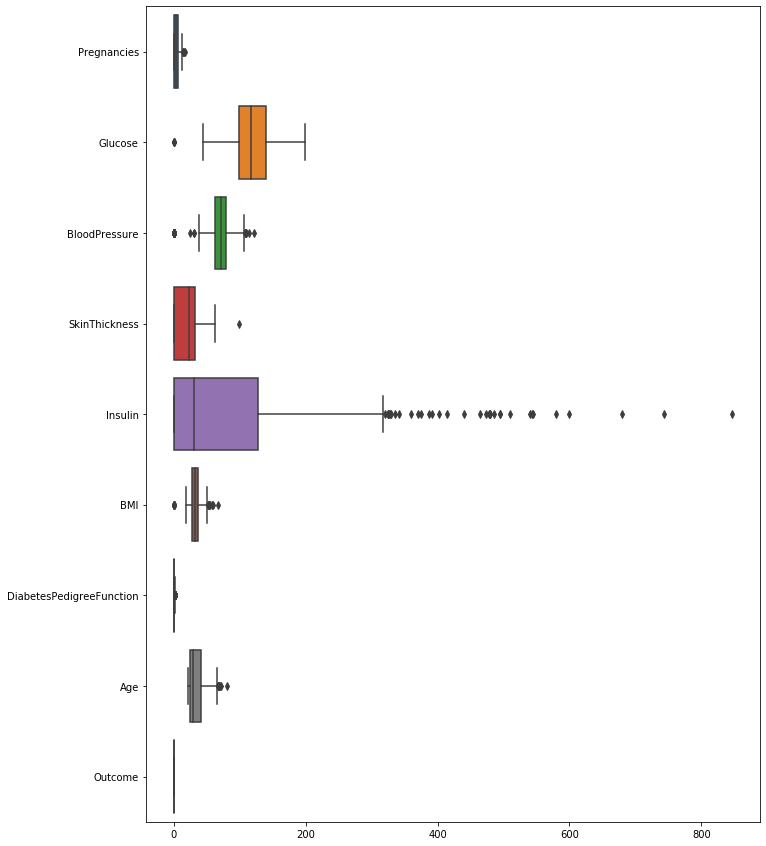

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(11, 15))
ax = sns.boxplot(data = df_data,orient='h')

In [ ]:
#bmi, glucose, bp
print("Glucose is zero for ",df_data[df_data['Glucose']==0].shape[0]," records")
print("BP is zero for ",df_data[df_data['BloodPressure']==0].shape[0]," records")
print("BMI is zero for ",df_data[df_data['BMI']==0].shape[0]," records")
print("Skin Thickness is zero for ",df_data[df_data['SkinThickness']==0].shape[0]," records")
print("Insulin is zero for ",df_data[df_data['Insulin']==0].shape[0]," records")


Glucose is zero for  5  records
BP is zero for  35  records
BMI is zero for  11  records
Skin Thickness is zero for  227  records
Insulin is zero for  374  records


The columns 'Glucose', 'BP' and 'BMI' have few records with 0 value. We can remove these records

In [ ]:
df_new_data=df_data[(df_data.Glucose!=0) & (df_data.BloodPressure!=0) & (df_data.BMI!=0)]
df_new_data.shape

(724, 9)

In order to do an error free analysis, removing 0 value records for 'Skin Thickness' and 'Insulin'

In [ ]:
df_new_data=df_data[(df_data.SkinThickness!=0) & (df_data.Insulin!=0)]
df_new_data.shape

(394, 9)

In [ ]:
df_new_data[df_new_data.Outcome==0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
18             1      103             30             38       83  43.3   
20             3      126             88             41      235  39.3   
27             1       97             66             15      140  23.2   
28            13      145             82             19      110  22.2   
..           ...      ...            ...            ...      ...   ...   
747            1       81             74             41       57  46.3   
751            1      121             78             39       74  39.0   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
18                      0.183   33        0  
20                      0.704   27        0  
27                      0.487   22        0  
28                      0.245   57        0  
..                        ...  ...      ...  
747                     1.096   32        0  
751                     0.261   28        0  
760                     0.766   22        0  
763                     0.171   63        0  
765                     0.245   30        0  

[264 rows x 9 columns]

<Figure size 432x288 with 0 Axes>

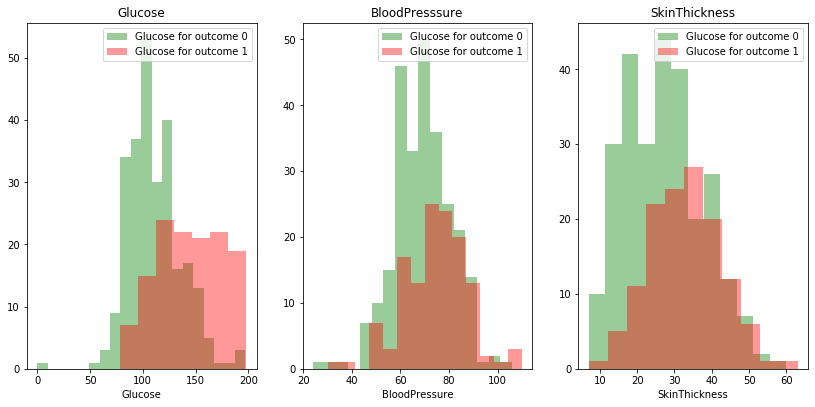

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Subplotting
plt.figure(1)
plt.figure(figsize = (14,14))
plt.subplot(231)
plt.title('Glucose')
sns.distplot(df_new_data[df_new_data.Outcome==0].Glucose,kde=False,color='green', label='Glucose for outcome 0')
sns.distplot(df_new_data[df_new_data.Outcome==1].Glucose,kde=False,color='red', label='Glucose for outcome 1')
plt.legend()

plt.subplot(232)
plt.title('BloodPresssure')
sns.distplot(df_new_data[df_new_data.Outcome==0].BloodPressure,kde=False,color='green', label='Glucose for outcome 0')
sns.distplot(df_new_data[df_new_data.Outcome==1].BloodPressure,kde=False,color='red', label='Glucose for outcome 1')
plt.legend()

plt.subplot(233)
plt.title('SkinThickness')
sns.distplot(df_new_data[df_new_data.Outcome==0].SkinThickness,kde=False,color='green', label='Glucose for outcome 0')
sns.distplot(df_new_data[df_new_data.Outcome==1].SkinThickness,kde=False,color='red', label='Glucose for outcome 1')
plt.legend()


Glucose data is slightly right-skewed. 
BP data is normally distributed with the mean value of 69.1, which is quite near the value of diastolic bp = 80

Diabetics have higher value of Glucose, BP and skin thickness as compared to non-diabetics.

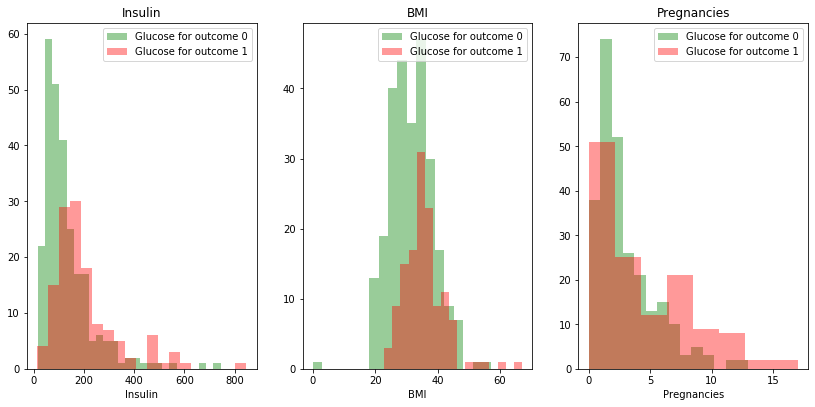

In [ ]:
plt.figure(figsize = (14,14))
plt.subplot(231)
plt.title('Insulin')
sns.distplot(df_new_data[df_new_data.Outcome==0].Insulin,kde=False,color='green', label='Insulin for outcome 0')
sns.distplot(df_new_data[df_new_data.Outcome==1].Insulin,kde=False,color='red', label='Insulin for outcome 1')
plt.legend()

plt.subplot(232)
plt.title('BMI')
sns.distplot(df_new_data[df_new_data.Outcome==0].BMI,kde=False,color='green', label='BMI for outcome 0')
sns.distplot(df_new_data[df_new_data.Outcome==1].BMI,kde=False,color='red', label='BMI for outcome 1')
plt.legend()

plt.subplot(233)
plt.title('Pregnancies')
sns.distplot(df_new_data[df_new_data.Outcome==0].Pregnancies,kde=False,color='green', label='Pregnancies for outcome 0')
sns.distplot(df_new_data[df_new_data.Outcome==1].Pregnancies,kde=False,color='red', label='Pregnancies for outcome 1')
plt.legend()


The 2-hour serum insulin values are right-tailed. Patients with higher insulin levels are diabetic.
Ideal BMI value should be 25. The graph shows that the entire dataset consists of people who have higher BMI.
There is a large count of records with 0 pregnancies, as the data set is collected for females having age 21 and above. It is likely that many are unmarried.

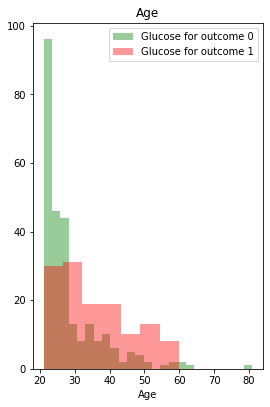

In [ ]:
plt.figure(figsize = (14,14))
plt.subplot(231)
plt.title('Age')
sns.distplot(df_new_data[df_new_data.Outcome==0].Age,kde=False,color='green', label='Age for outcome 0')
sns.distplot(df_new_data[df_new_data.Outcome==1].Age,kde=False,color='red', label='Age for outcome 1')
plt.legend()

Age data is rightly skewed. There are more patients in the higher age group. It is likely to get diabetes as a person gets old.

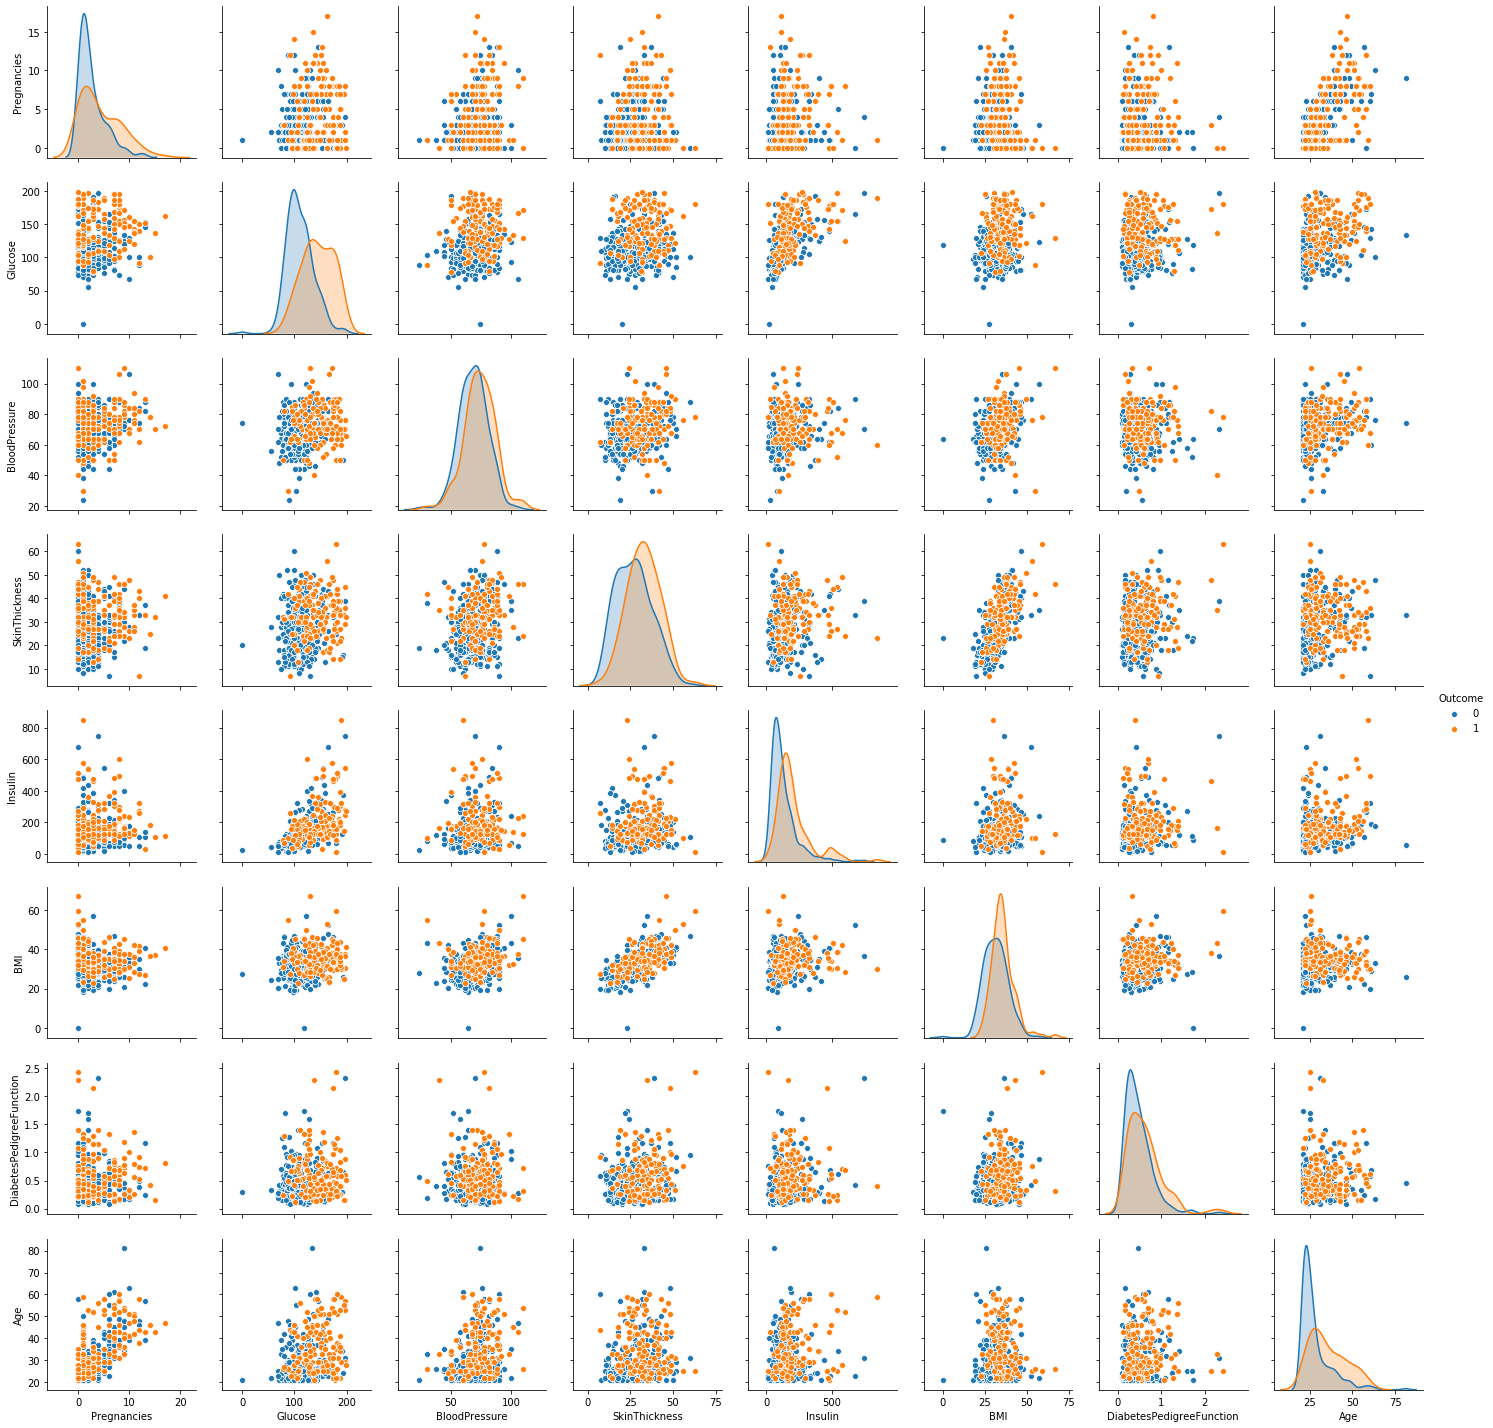

In [ ]:
sns.pairplot(df_new_data,vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'],hue='Outcome')

It is observed that the following have positive linear correlation:
1. BMI and Skin thickness
2. Age and Pregnancies
3. Glucose and Insulin

In [ ]:
data_corr=df_new_data.corr(method='pearson')
data_corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.201487       0.213740       0.095997   
Glucose                      0.201487  1.000000       0.203356       0.203526   
BloodPressure                0.213740  0.203356       1.000000       0.232342   
SkinThickness                0.095997  0.203526       0.232342       1.000000   
Insulin                      0.082171  0.580010       0.098272       0.184888   
BMI                         -0.011282  0.208711       0.301530       0.653425   
DiabetesPedigreeFunction    -0.000402  0.140409      -0.020834       0.154056   
Age                          0.680920  0.346041       0.299845       0.170694   
Outcome                      0.258846  0.512201       0.192819       0.257854   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.082171 -0.011282                 -0.000402   
Glucose                   0.580010  0.208711                  0.140409   
BloodPressure             0.098272  0.301530                 -0.020834   
SkinThickness             0.184888  0.653425                  0.154056   
Insulin                   1.000000  0.228328                  0.130395   
BMI                       0.228328  1.000000                  0.112954   
DiabetesPedigreeFunction  0.130395  0.112954                  1.000000   
Age                       0.220261  0.080778                  0.076609   
Outcome                   0.303454  0.271796                  0.200759   

                               Age   Outcome  
Pregnancies               0.680920  0.258846  
Glucose                   0.346041  0.512201  
BloodPressure             0.299845  0.192819  
SkinThickness             0.170694  0.257854  
Insulin                   0.220261  0.303454  
BMI                       0.080778  0.271796  
DiabetesPedigreeFunction  0.076609  0.200759  
Age                       1.000000  0.352982  
Outcome                   0.352982  1.000000

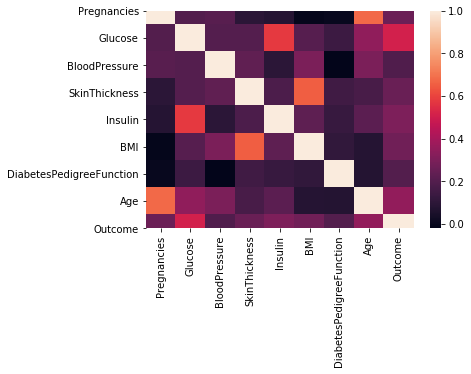

In [ ]:
sns.heatmap(data_corr)

There are no strong correlations.
A moderate positive correlation is observed between:
1. Age and Pregnancies
2. BMI and Skin Thickness
3. Insulin and Glucose

These factors must be kept in mind in model building, as they may increase the variance of the model.